# Cluster Analysis

**Write and execute R code in the code cells per the instructions.  The expected results are provided for you directly following the code cells.**

In [75]:
f = "setup.R"; for (i in 1:10) { if (file.exists(f)) break else f = paste0("../", f) }; source(f)

.................................................... start of document ....................................................

## Data

In [76]:
data = data.frame(name=c("A","B","C","D","E","F","G","H","I","J","K","L","M","N"),
                  x1=c(2.5, 2, 9, 6.5, 8, 4, 10, 10.5, 3, 5, 3, 6, 1, 1.5),
                  x2=c(9, 3.5, 1, 11, 2.5, 8.5, 4, 7.5, 3, 4, 7, 6, 1, 1.5),
                  x3=c(9, 10, 1, 2, 1.5, 10.5, 9.5, 11, 3, 5, 9, 6, 1, 1.5))
data

name,x1,x2,x3
A,2.5,9.0,9.0
B,2.0,3.5,10.0
C,9.0,1.0,1.0
D,6.5,11.0,2.0
E,8.0,2.5,1.5
F,4.0,8.5,10.5
G,10.0,4.0,9.5
H,10.5,7.5,11.0
I,3.0,3.0,3.0
J,5.0,4.0,5.0


## Problem 1

Normalize the numeric variables of the data.  Show all pairwise inter-observation distances (based on normalized data), expressed as a distance semi-matrix and as a matrix.  Show the mean distance between the first observation and all other observations (based on normalized data).

You may want to use these function(s):
* scale()
* dist()
* as.matrix()

Recall that a matrix is like a data frame with all numeric values.

In [77]:
data.norm = setNames(cbind(data, scale(data[, c("x1","x2","x3")])), 
                c(names(data), c("x1","x2","x3")))
data.norm = data.norm[, c(1,5,6,7)]
data.norm

name,x1,x2,x3
A,-0.81796097,1.2559254,0.82369459
B,-0.97271034,-0.4556897,1.07438424
C,1.19378088,-1.2336966,-1.18182267
D,0.42003401,1.8783308,-0.93113301
E,0.88428213,-0.7668925,-1.05647784
F,-0.35371285,1.1003240,1.19972907
G,1.50327962,-0.3000884,0.94903941
H,1.65802900,0.7891212,1.32507390
I,-0.66321160,-0.6112911,-0.68044335
J,-0.04421411,-0.3000884,-0.17906404


In [78]:
d = dist(data.norm[,c("x1","x2","x3")])
d

           1         2         3         4         5         6         7
2  1.7367841                                                            
3  3.7772241 3.2232667                                                  
4  2.2359428 3.3777934 3.2165578                                        
5  3.2441442 2.8435614 0.5739398 2.6885766                              
6  0.6173654 1.6792998 3.6761634 2.3967795 3.1795595                    
7  2.7973287 2.4840389 2.3469101 3.0747324 2.1501543 2.3393206          
8  2.5690102 2.9211623 3.2545120 2.7945445 2.9481607 2.0395254 1.1626379
9  2.4026809 1.7886926 2.0216802 2.7266250 1.6001095 2.5613403 2.7286893
10 2.0063369 1.5676255 1.8465592 2.3508816 1.3600979 1.9894760 1.9150337
11 0.6413548 1.1597467 3.3101386 2.4088162 2.8090817 0.6746091 2.3624182
12 1.6157516 1.7729780 2.2032740 1.8575928 1.6858686 1.5036855 1.6400839
13 3.2304556 2.4065647 2.4759900 3.5560078 2.2197526 3.4614370 3.6292072
14 3.0130532 2.2252886 2.3298242 3.3392968 2.035670

In [79]:
as.matrix(d)

1,2,3,4,5,6,7,8,9,10,11,12,13,14
0.0000000,1.736784,3.7772241,2.235943,3.2441442,0.6173654,2.797329,2.569010,2.4026809,2.0063369,0.6413548,1.6157516,3.2304556,3.0130532
1.7367841,0.000000,3.2232667,3.377793,2.8435614,1.6792998,2.484039,2.921162,1.7886926,1.5676255,1.1597467,1.7729780,2.4065647,2.2252886
3.7772241,3.223267,0.0000000,3.216558,0.5739398,3.6761634,2.346910,3.254512,2.0216802,1.8465592,3.3101386,2.2032740,2.4759900,2.3298242
2.2359428,3.377793,3.2165578,0.000000,2.6885766,2.3967795,3.074732,2.794544,2.7266250,2.3508816,2.4088162,1.8575928,3.5560078,3.3392968
3.2441442,2.843561,0.5739398,2.688577,0.0000000,3.1795595,2.150154,2.948161,1.6001095,1.3600979,2.8090817,1.6858686,2.2197526,2.0356700
0.6173654,1.679300,3.6761634,2.396780,3.1795595,0.0000000,2.339321,2.039525,2.5613403,1.9894760,0.6746091,1.5036855,3.4614370,3.2302731
2.7973287,2.484039,2.3469101,3.074732,2.1501543,2.3393206,0.000000,1.162638,2.7286893,1.9150337,2.3624182,1.6400839,3.6292072,3.3982618
2.5690102,2.921162,3.2545120,2.794544,2.9481607,2.0395254,1.162638,0.000000,3.3721524,2.5192142,2.3798636,1.9310038,4.3613441,4.1130564
2.4026809,1.788693,2.0216802,2.726625,1.6001095,2.5613403,2.728689,3.372152,0.0000000,0.8552112,1.9524306,1.5163566,1.0109044,0.7581783
2.0063369,1.567625,1.8465592,2.350882,1.3600979,1.9894760,1.915034,2.519214,0.8552112,0.0000000,1.5034318,0.7389339,1.8465592,1.5964243


In [80]:
n = mean(dist(data.norm[,c("x1","x2","x3")]))
df = data.frame(mean_distance_to_observation_1=n)
df

mean_distance_to_observation_1
2.291752


## Problem 2

Construct a 3-cluster model of the data, using hierarchical agglomeration with complete linkage, applied to the **normalized** data - call this Cluster Model I.  Show the associated dendrogram, 2-D scatter plots of the **original** data (x1 vs x2, x1 vs x3, x2 vs x3) color-coded by cluster assignment, and 3-D scatter plot of the **orginal data** (x1 vs x2 vs x3) color-coded by cluster assignment.

You may want to use these function(s):
* hclust()
* ggdendrogram()
* cutree()

Use `tree = hclust(..., method="complete")` to construct a dendrogram.
Use `ggdendrogram(tree, theme_dendro=FALSE)` with axis labels adjustments to visualize the dendrogram.
Use `cutree(tree, k=3)` to construct a 3-cluster model from the dendrogram.
Use `geom_point(aes(..., ..., color=as.factor(...)))` to color code observations.

Warning message in dist(data.norm):
“NAs introduced by coercion”


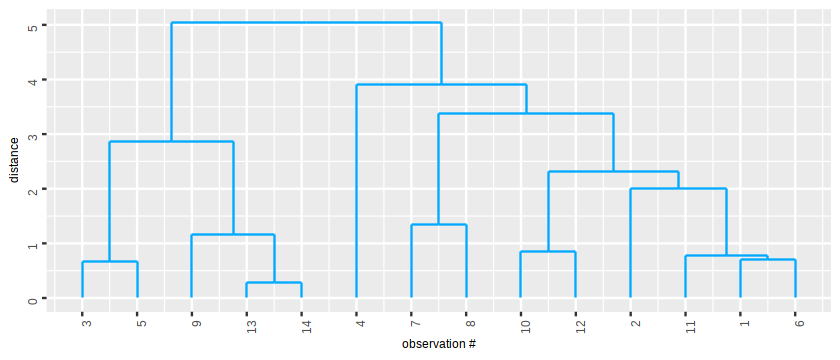

In [81]:
tree = hclust(dist(data.norm), method="complete")
ggdendrogram(tree, theme_dendro=FALSE) + xlab("observation #") + ylab("distance")

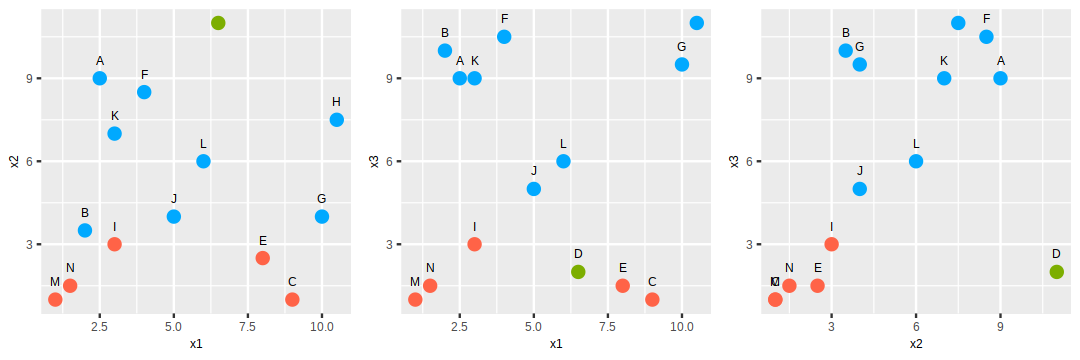

In [82]:
# Cluster Model I

clusters = cutree(tree, k=3)
data.c.I = clusters

output_size(9,3)

p1 = ggplot(data) + geom_point(aes(x=x1, y=x2, color=as.factor(clusters))) + geom_text(aes(x=x1, y=x2, label=name)) +
     theme.no_legend

p2 = ggplot(data) + geom_point(aes(x=x1, y=x3, color=as.factor(clusters))) + geom_text(aes(x=x1, y=x3, label=name)) +
     theme.no_legend

p3 = ggplot(data) + geom_point(aes(x=x2, y=x3, color=as.factor(clusters))) + geom_text(aes(x=x2, y=x3, label=name)) + theme.no_legend

grid.arrange(p1, p2, p3, nrow=1)

output_size(restore)

In [83]:
p = open3d()
view3d(-20, -4, zoom=0.65)
plot3d(data[,c("x1","x2","x3")], type="s", col=as.factor(clusters))
grid3d(c("z1", "z1", "z3"))
rglwidget(elementId="myplot", width=600, height=600, reuse=FALSE)

HTML widgets cannot be represented in plain text (need html)

## Problem 3

Construct a 3-cluster model of the data, using k-means with 1 start and randomization seed **123**, applied to the **normalized** data - call this Cluster Model II.  Show 2-D scatter plots of the **original** data (x1 vs x2, x1 vs x3, x2 vs x3) color-coded by cluster assignment, and 3-D scatter plot of the **original** data (x1 vs x2 vs x3) color-coded by cluster assignment.

Construct a 3-cluster model of the data, using k-means with 1 start and randomization seed **1234**, applied to the **normalized** data - call this Cluster Model III.  Show 2-D scatter plots of the **original** data (x1 vs x2, x1 vs x3, x2 vs x3) color-coded by cluster assignment, and 3-D scatter plot of the **original** (x1 vs x2 vs x3) color-coded by cluster assignment.


You may want to use these function(s):
* set.seed()
* kmeans()

Use `set.seed(123)` to set the randomization seed to 123.
Use `set.seed(1234)` to set the randomization seed to 1234.
Use `kmeans(..., 3, nstart=1)$cluster` to construct the 3-cluster model.

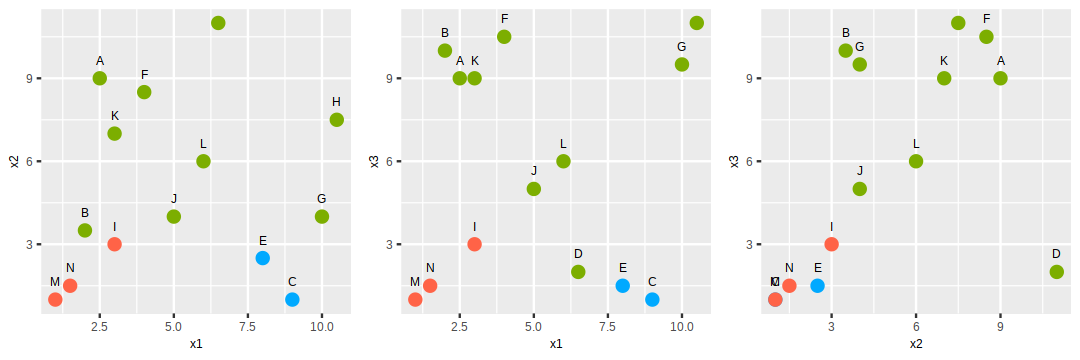

In [84]:
# Cluster Model II

set.seed(123)
data.norm$cluster = kmeans(data.norm[c("x1", "x2", "x3")], 3, nstart=1)$cluster
data.c.II = data.norm$cluster

output_size(9,3)

p1 = ggplot(data) + geom_point(aes(x=x1, y=x2, color=as.factor(data.norm$cluster))) + geom_text(aes(x=x1, y=x2, label=name)) +
     theme.no_legend

p2 = ggplot(data) + geom_point(aes(x=x1, y=x3, color=as.factor(data.norm$cluster))) + geom_text(aes(x=x1, y=x3, label=name)) +
     theme.no_legend

p3 = ggplot(data) + geom_point(aes(x=x2, y=x3, color=as.factor(data.norm$cluster))) + geom_text(aes(x=x2, y=x3, label=name)) + theme.no_legend

grid.arrange(p1, p2, p3, nrow=1)

output_size(restore)


In [85]:
p = open3d()
view3d(-20, -4, zoom=0.65)
plot3d(data[,c("x1","x2","x3")], type="s", col=as.factor(data.norm$cluster))
grid3d(c("x1", "x2", "x3"))
rglwidget(elementId="myplot", width=600, height=600, reuse=FALSE)

HTML widgets cannot be represented in plain text (need html)

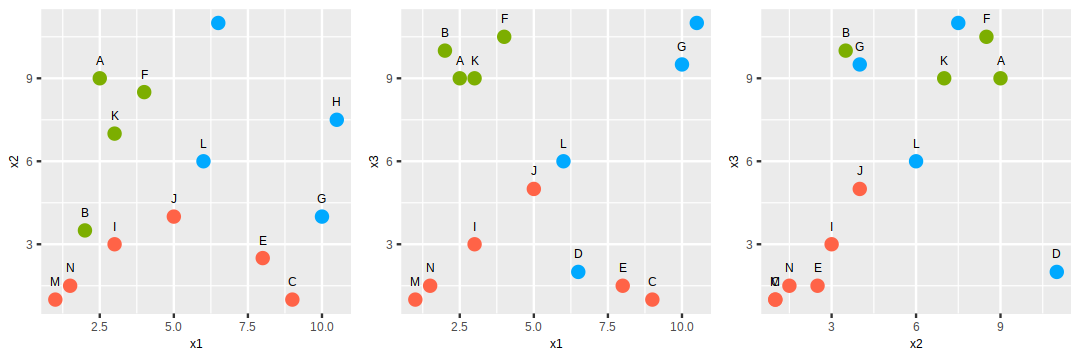

In [86]:
# Cluster Model III

set.seed(1234)
data.norm$cluster = kmeans(data.norm[c("x1", "x2", "x3")], 3, nstart=1)$cluster
data.c.III = data.norm$cluster

output_size(9,3)

p1 = ggplot(data) + geom_point(aes(x=x1, y=x2, color=as.factor(data.norm$cluster))) + geom_text(aes(x=x1, y=x2, label=name)) +
     theme.no_legend

p2 = ggplot(data) + geom_point(aes(x=x1, y=x3, color=as.factor(data.norm$cluster))) + geom_text(aes(x=x1, y=x3, label=name)) +
     theme.no_legend

p3 = ggplot(data) + geom_point(aes(x=x2, y=x3, color=as.factor(data.norm$cluster))) + geom_text(aes(x=x2, y=x3, label=name)) + theme.no_legend

grid.arrange(p1, p2, p3, nrow=1)

output_size(restore)

In [87]:
p = open3d()
view3d(-20, -4, zoom=0.65)
plot3d(data[,c("x1","x2","x3")], type="s", col=as.factor(data.norm$cluster))
grid3d(c("x1", "x2", "x3"))
rglwidget(elementId="myplot", width=600, height=600, reuse=FALSE)

HTML widgets cannot be represented in plain text (need html)

## Problem 4

Construct a 3-cluster model of the data, using Gaussian mixture model estimation by expectation-maximization with randomization seed 12345, applied to the **original** data - call this Cluster Model IV.  Show 2-D scatter plots of the **original** data (x1 vs x2, x1 vs x3, x2 vs x3) color-coded by cluster assignment, and 3-D scatter plot of the **original** data (x1 vs x2 vs x3) color-coded by cluster assignment.

You may want to use these function(s):
* set.seed()
* Mclust()

Use `Mclust(..., G=3)$classification` to construct the 3-cluster model.

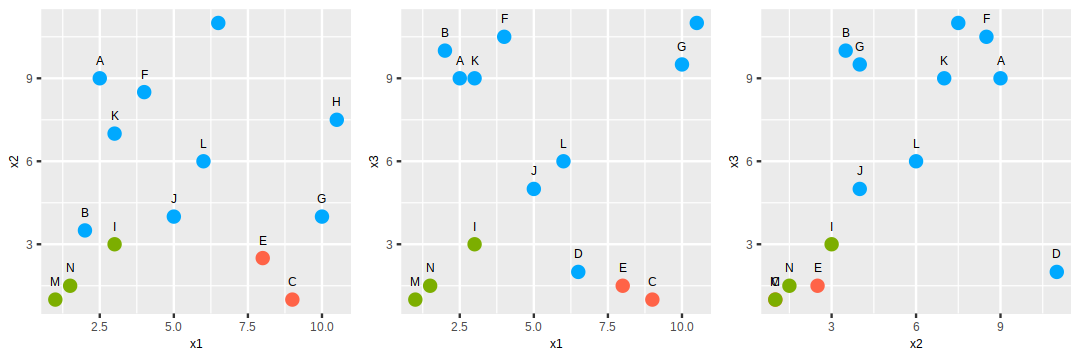

In [88]:
# Cluster Model IV

set.seed(12345)
data$cluster = Mclust(data[c("x1", "x2", "x3")], G=3)$classification
data.c.IV = data$cluster

output_size(9,3)

p1 = ggplot(data) + geom_point(aes(x=x1, y=x2, color=as.factor(data$cluster))) + geom_text(aes(x=x1, y=x2, label=name)) +
     theme.no_legend

p2 = ggplot(data) + geom_point(aes(x=x1, y=x3, color=as.factor(data$cluster))) + geom_text(aes(x=x1, y=x3, label=name)) +
     theme.no_legend

p3 = ggplot(data) + geom_point(aes(x=x2, y=x3, color=as.factor(data$cluster))) + geom_text(aes(x=x2, y=x3, label=name)) + theme.no_legend

grid.arrange(p1, p2, p3, nrow=1)

output_size(restore)

In [89]:
p = open3d()
view3d(-20, -4, zoom=0.65)
plot3d(data[,c("x1","x2","x3")], type="s", col=as.factor(data$cluster))
grid3d(c("x1", "x2", "x3"))
rglwidget(elementId="myplot", width=600, height=600, reuse=FALSE)

HTML widgets cannot be represented in plain text (need html)

## Problem 5

Show the original data marked with cluster assignments for Cluster Models I, II, III, and IV.

Show the normalized data marked with cluster assigments for Cluster Models I, II, III, and IV.

In [90]:
df_clusters = data.frame(name=data$name,
                         cluster.I=data.c.I,
                         cluster.II=data.c.II,
                         cluster.III=data.c.III,
                         cluster.IV=data.c.IV)
merge(data, df_clusters, by="name")

name,x1,x2,x3,cluster,cluster.I,cluster.II,cluster.III,cluster.IV
A,2.5,9.0,9.0,1,1,3,3,1
B,2.0,3.5,10.0,1,1,3,3,1
C,9.0,1.0,1.0,2,2,1,2,2
D,6.5,11.0,2.0,1,3,3,1,1
E,8.0,2.5,1.5,2,2,1,2,2
F,4.0,8.5,10.5,1,1,3,3,1
G,10.0,4.0,9.5,1,1,3,1,1
H,10.5,7.5,11.0,1,1,3,1,1
I,3.0,3.0,3.0,3,2,2,2,3
J,5.0,4.0,5.0,1,1,3,2,1


In [91]:
df_clusters = data.frame(name=data$name,
                         cluster.I=data.c.I,
                         cluster.II=data.c.II,
                         cluster.III=data.c.III,
                         cluster.IV=data.c.IV)
df_norm = merge(data.norm, df_clusters, by="name")
df_norm

name,x1,x2,x3,cluster,cluster.I,cluster.II,cluster.III,cluster.IV
A,-0.81796097,1.2559254,0.82369459,3,1,3,3,1
B,-0.97271034,-0.4556897,1.07438424,3,1,3,3,1
C,1.19378088,-1.2336966,-1.18182267,2,2,1,2,2
D,0.42003401,1.8783308,-0.93113301,1,3,3,1,1
E,0.88428213,-0.7668925,-1.05647784,2,2,1,2,2
F,-0.35371285,1.1003240,1.19972907,3,1,3,3,1
G,1.50327962,-0.3000884,0.94903941,1,1,3,1,1
H,1.65802900,0.7891212,1.32507390,1,1,3,1,1
I,-0.66321160,-0.6112911,-0.68044335,2,2,2,2,3
J,-0.04421411,-0.3000884,-0.17906404,2,1,3,2,1


## Problem 6

For Cluster Model IV, show the intracluster dispersion of each cluster, mean intracluster dispersion, cluster centroids, mean intercluster dispersion, and dispersion ratio.

You may want to use these function(s):
* dist()
* mean()
* colMeans()
* t()
* rbind()

Recall that dispersions should be computed based on normalized data regardless of which method was used to construct the cluster model.
Use `rbind(t(colMeans(...)), t(colMeans(...)), t(colMeans(...)))` to construct the table of centroids.

In [92]:
df_norm.1 = df_norm[,c("name","x1","x2","x3","cluster.IV")]
df_norm.1.1 = df_norm.1[df_norm.1$cluster.IV==1,]
df_norm.1.2 = df_norm.1[df_norm.1$cluster.IV==2,]
df_norm.1.3 = df_norm.1[df_norm.1$cluster.IV==3,]
a = mean(dist(df_norm.1.1[,2:4]))
b = mean(dist(df_norm.1.2[,2:4]))
c = mean(dist(df_norm.1.3[,2:4]))
result = data.frame("intracluster_dispersion"=c(a,b,c))
result

intracluster_dispersion
1.9444398
0.5739398
0.6739363


In [93]:
mean_intracluster_dispersion = mean(result$intracluster_dispersion)
result.1 = data.frame("mean_intracluster_dispersion"=mean_intracluster_dispersion)
result.1

mean_intracluster_dispersion
1.064105


In [94]:
result.2 = rbind(t(colMeans(df_norm.1.1[,2:4])), 
                 t(colMeans(df_norm.1.2[,2:4])), 
                 t(colMeans(df_norm.1.3[,2:4])))
result.2

x1,x2,x3
0.1105353,0.5470747,0.5730049
1.0390315,-1.0002945,-1.1191503
-1.0242935,-0.9743610,-0.9729146


In [95]:
mean_intercluster_dispersion = mean(dist(result.2))
result.3 = data.frame("mean_intercluster_dispersion"=mean_intercluster_dispersion)
result.3

mean_intercluster_dispersion
2.330149


In [96]:
dispersion_ratio = data.frame(dispersion_ratio=mean_intercluster_dispersion / mean_intracluster_dispersion)
dispersion_ratio


dispersion_ratio
2.189773


<font size=1;>
<p style="text-align: left;">
Copyright (c) Berkeley Data Analytics Group, LLC
<span style="float: right;">
Document revised February 24, 2020
</span>
</p>
</font>